# Exploratory Data Analysis

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [About the data](#section102)<br/>
- 2. [Loading the packages and data](#section2)</br>
    - 2.1 [Exploratory data analysis](#section2.1)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [Understanding the dataset](#section301)<br/>
    - 3.2 [Pandas profiling](#section302)<br/>
    - 3.3 [Initial observations](#section303)<br/>
- 4. [Data Handling](#section4)</br>
    - 4.1 [Dropping duplicate values](#section401)<br/>
    - 4.2 [Missing data and its imputation](#section402)<br/>
    - 4.3 [Grouping](#section403)<br/>
- 5. [Data Visualization](#section5)</br>
- 6. [Summary](#section6)</br>
- 7. [Converting object variables to numeric](#section7)<br/>
- 8. [Building model for prediction](#section8)<br/>
    - 8.1 [Logistic Regression](#section801)<br/>
    - 8.2 [K-Nearest Neighbor(KNN)](#section802)<br/>
    - 8.3 [Gradientboosting Classifier](#section803)<br/>
    - 8.4 [Decision Tree](#section804)<br/>
    - 8.5 [RandomForest Classifier](#section805)<br/>
    - 8.6 [SVC](#section806)<br/>

# 1. Problem Statement

To predict whether an employee will leave or stay.

## 1.1 Introduction

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.And then building ___model___ for __Prediction__ 

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA is a critical and the first step in analyzing the data and we do this for the below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

## 1.2 About the data
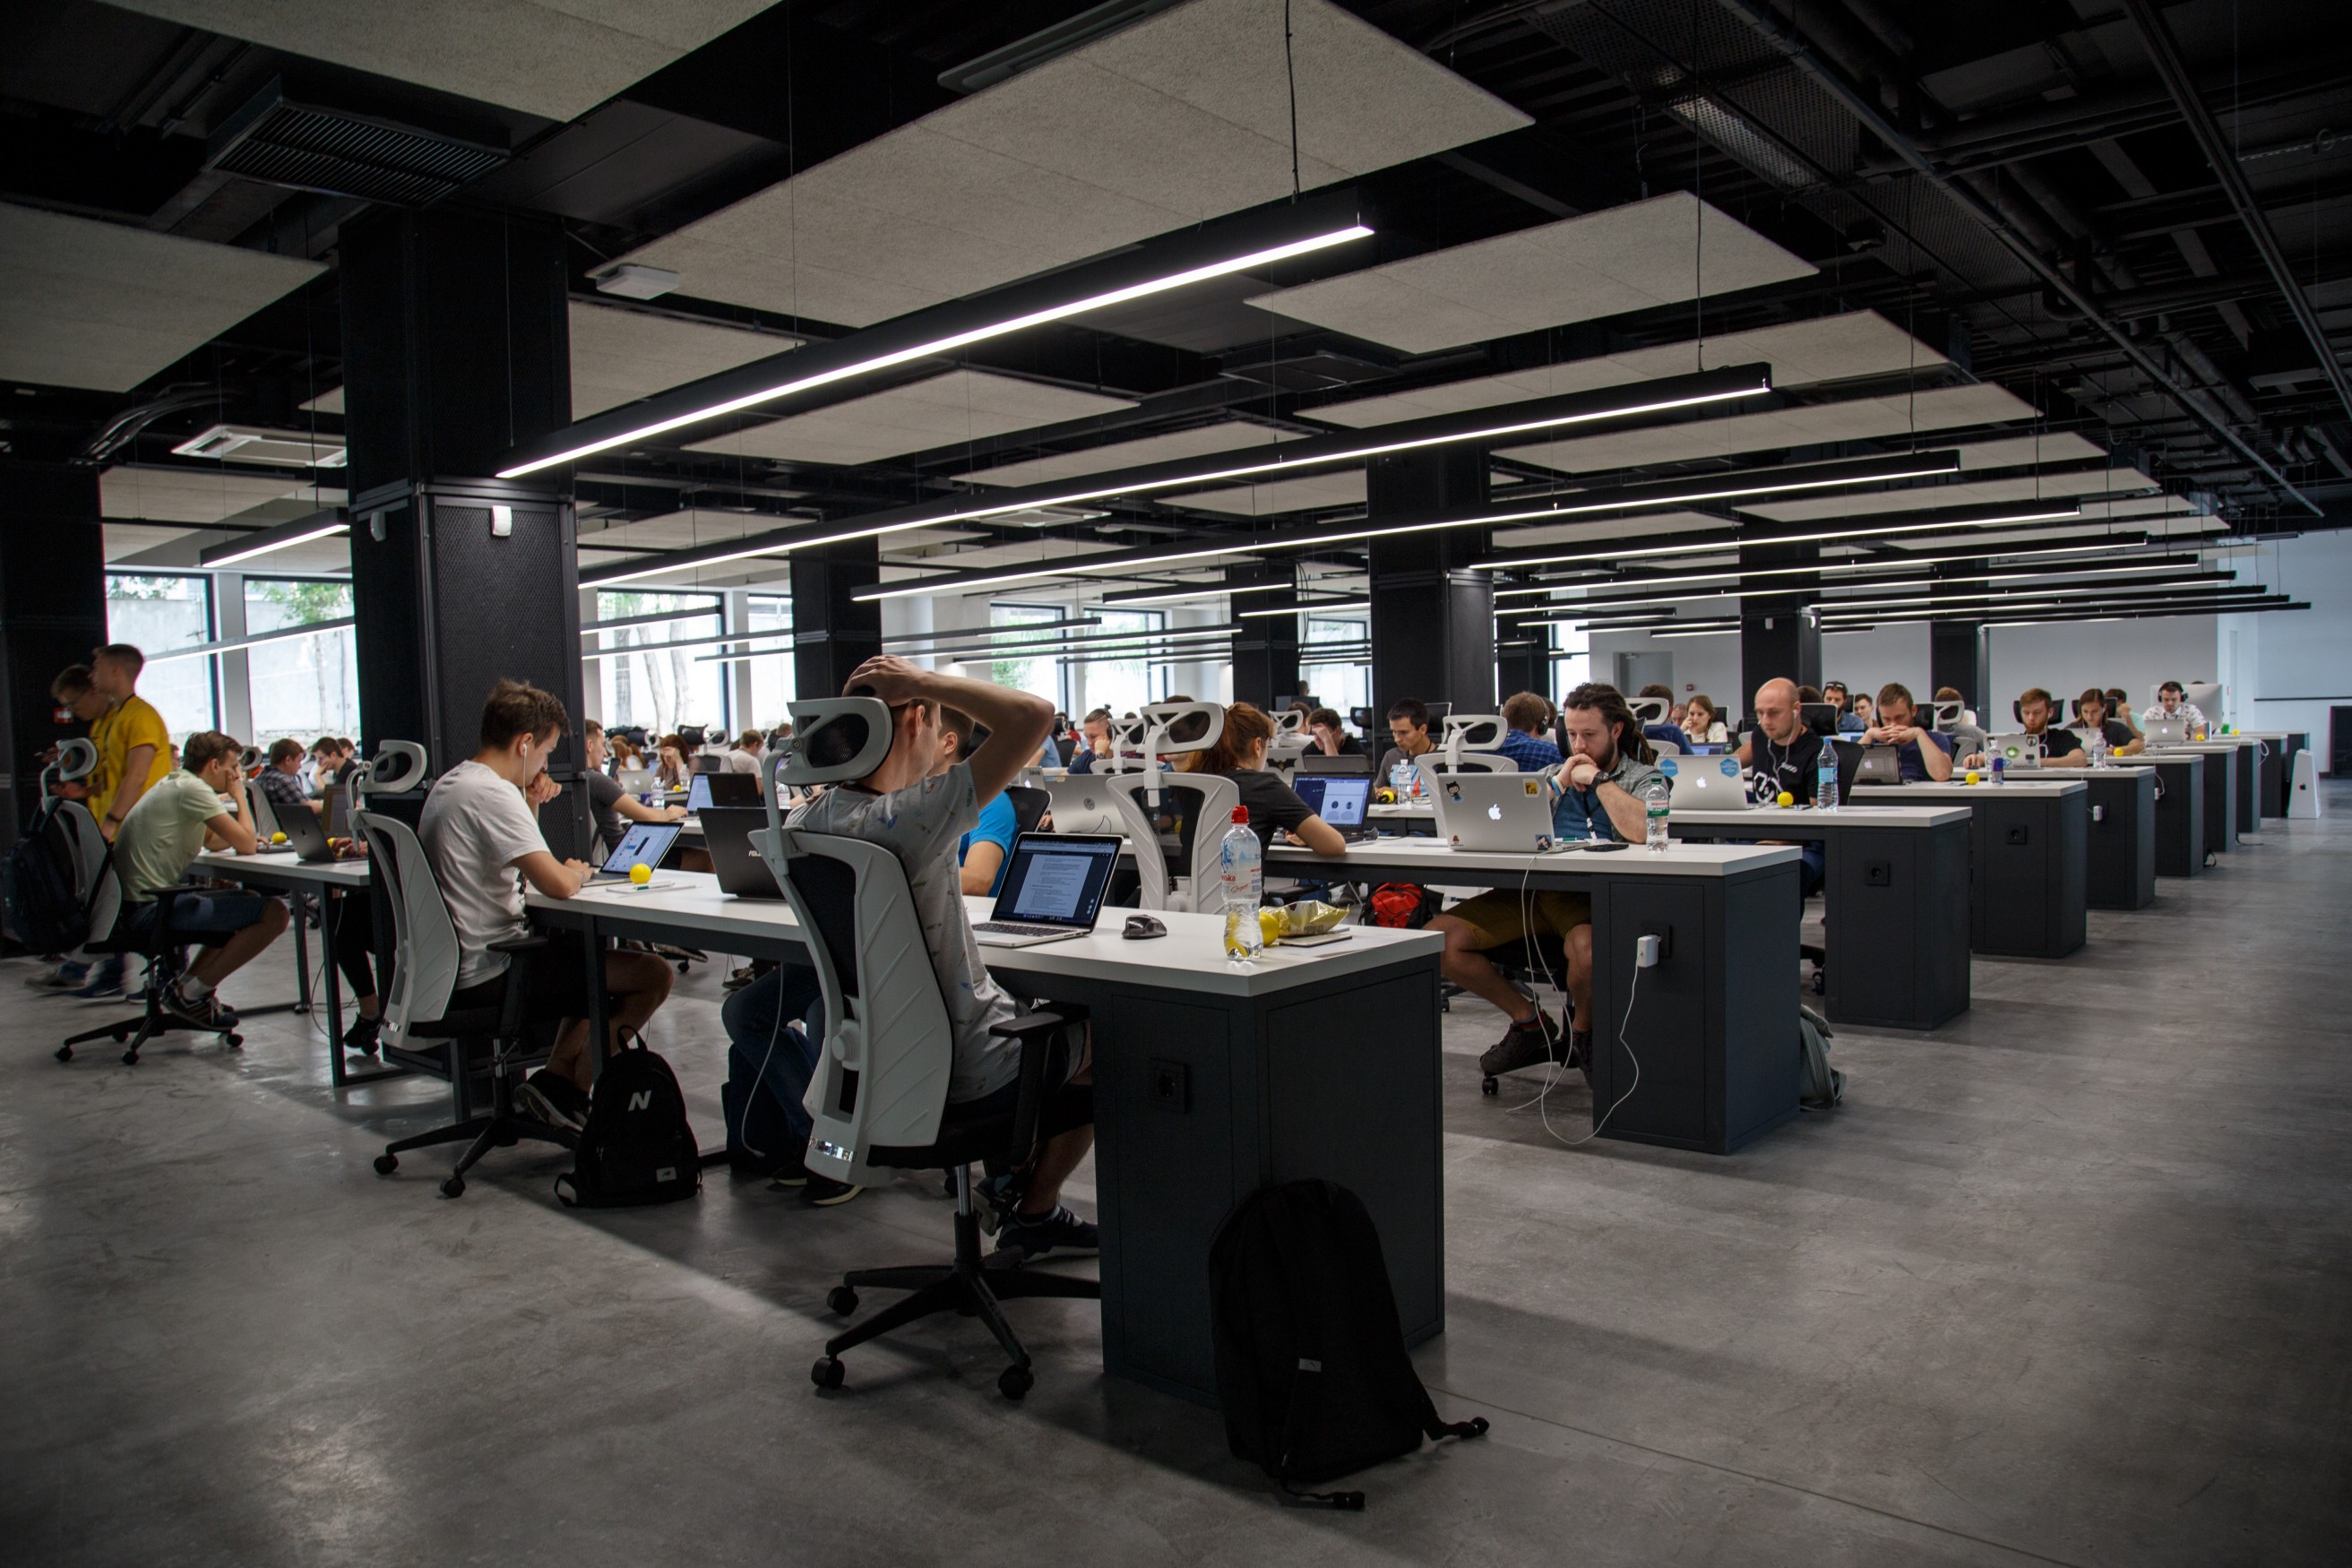

- The dataset consists of the information about three main categories - departments, employees and  employee details - given as 3 separate tables. We joined these 3 tables on the basis of department_id and employee_id to form a common table named __employee_df__ . Various features present in the dataset includes age, gender, filed complaint or not, number of projects, marital status, recently promorted or not etc.
- The dataset comprises of __14145 observations of 17 columns__. Below is a table showing names of all the columns and their description.

| Column Name              | Description                                                                |
| -------------            |:-------------                                                             :| 
| employee_id              | Unique ID Number for each employee                                         |                    
| department               | Department to which the employees belong(ed) to                            |  
| avg_monthly_hrs          | Average number of hours worked per month                                   | 
| filed_complaint          | Has the employee filed a formal complaint in the last 3 years?             |   
| last_evaluation          | Score for most recent evaluation of employee (higher is better)            |
| n_projects               | Number of projects employee has worked on                                  |
| recently_promoted        | Was the employee promoted in the last 3 years?                             |
| salary                   | Salary level with respect to rest of their department                      |
| satisfaction             | Score for employee’s satisfaction with the company (higher is better)      |
| tenure                   | Number of years at the company                                             |
| age                      | Age of the employee                                                        |
| marital_status           | Marital Status of the employee                                             |
| status                   | Current employment status (Employed / Left)                                |
| dept_id                  | ID  of department                                                          |
| dept_name                | Name of department                                                         |
| dept_head                | Head of department                                                         |

# 2. Loading packages and data

## NOTE: Please ensure all required packages are installed before running this jupyter notebook.

In [4]:
# importing packages
import mysql.connector
from mysql.connector import Error
import numpy as np
import pandas as pd 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline  
import warnings

In [5]:
#db_config = read_db_config()
conn = mysql.connector.connect(host=	'projects.insaid.co',
		user=	'student',
		passwd=	'student',
		database=	'Capstone2')
#conn = MySQLConnection(**db_config)

##################################################

#Fetching department data
filename=open('department_data.csv','w')
c=csv.writer(filename)

query = ("SELECT * from department_data")

cursor = conn.cursor()

cursor.execute(query)

#First need to fetch data
data = cursor.fetchall()
for item in data:
    c.writerow(item )

dept_df = pd.read_sql(query, con=conn)

cursor.close()
filename.close()

##################################################

filename=open('employee_details_data.csv','w')
c=csv.writer(filename)

query = ("SELECT * from employee_details_data")

cursor = conn.cursor()

cursor.execute(query)

#First need to fetch data
data = cursor.fetchall()
for item in data:
    c.writerow(item )


emp_df = pd.read_sql(query, con=conn)

cursor.close()
filename.close()

##################################################

filename=open('employee_data.csv','w')
c=csv.writer(filename)

query = ("SELECT * from employee_data")

cursor = conn.cursor()

cursor.execute(query)

#First need to fetch data
data = cursor.fetchall()
for item in data:
    c.writerow(item )

emp_det_df = pd.read_sql(query, con=conn)

cursor.close()
filename.close()

##################################################

conn.close()

# 2.1 Exploratory data analysis

In [6]:
dept_df.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [7]:
#Department Master Table
dept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
dept_id      11 non-null object
dept_name    11 non-null object
dept_head    11 non-null object
dtypes: object(3)
memory usage: 392.0+ bytes


In [8]:
dept_df.shape

(11, 3)

In [9]:
emp_df.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [10]:
# Employee Master Table
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
employee_id       14245 non-null int64
age               14245 non-null int64
gender            14245 non-null object
marital_status    14245 non-null object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [11]:
#Checking shape of employee table
emp_df.shape

(14245, 4)

In [12]:
#Employee Detail Table
emp_det_df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [13]:
#Employee Detail Table
emp_det_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
avg_monthly_hrs      14150 non-null float64
department           13443 non-null object
filed_complaint      2046 non-null float64
last_evaluation      12663 non-null float64
n_projects           14150 non-null int64
recently_promoted    297 non-null float64
salary               14150 non-null object
satisfaction         14000 non-null float64
status               14150 non-null object
tenure               14000 non-null float64
employee_id          14150 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [14]:
#Count of number of employees
emp_det_df['employee_id'].count()

14150

In [15]:
#Count of unique number of employees
emp_det_df['employee_id'].nunique()

14117

In [16]:
#Count of number of employees in Employee master table
emp_df['employee_id'].count()

14245

In [17]:
#Count of unique employees in Employee master table
emp_df['employee_id'].nunique()

14245

# 3. Data profiling

In [18]:
# merging employee_details_data and employee_data
data_emp = pd.merge(emp_det_df, emp_df, how='inner', left_on = 'employee_id', right_on = 'employee_id')
data_emp.head(10)
# merging data_emp with department table
employee_df = pd.merge(data_emp, dept_df, how='outer', left_on = 'department', right_on = 'dept_id')
employee_df.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
14140,223.0,-IT,NaN,0.897100,5,NaN,medium,0.895458,Left,5.0,133677,40,Female,Married,NaN,NaN,NaN
14141,123.0,-IT,NaN,0.774735,2,NaN,medium,0.508124,Employed,4.0,107214,24,Female,Unmarried,NaN,NaN,NaN
14142,216.0,-IT,NaN,0.736369,4,NaN,medium,0.856901,Employed,4.0,116349,54,Male,Married,NaN,NaN,NaN
14143,128.0,-IT,1.0,0.458317,3,NaN,low,0.447364,Employed,2.0,106545,23,Male,Unmarried,NaN,NaN,NaN
14144,242.0,-IT,NaN,0.931467,4,NaN,medium,0.635758,Employed,2.0,101735,28,Male,Unmarried,NaN,NaN,NaN


## 3.1 Understanding the dataset

In [19]:
employee_df.head() # checking top 5 data in dataset

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42,Female,Married,NaN,NaN,NaN
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23,Female,Unmarried,NaN,NaN,NaN
2,155.0,None,NaN,0.464598,2,NaN,medium,0.414451,Left,3.0,127792,23,Female,Unmarried,NaN,NaN,NaN
3,156.0,None,NaN,NaN,2,NaN,medium,0.465747,Left,3.0,128509,25,Female,Unmarried,NaN,NaN,NaN
4,233.0,None,NaN,0.965382,5,NaN,medium,0.962314,Left,5.0,125077,22,Female,Unmarried,NaN,NaN,NaN


In [20]:
employee_df.shape  # checking shape of dataset

(14145, 17)

In [21]:

employee_df.columns   # checking columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'dept_id',
       'dept_name', 'dept_head'],
      dtype='object')

In [22]:
employee_df.info()   # checking data type of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 17 columns):
avg_monthly_hrs      14145 non-null float64
department           13439 non-null object
filed_complaint      2046 non-null float64
last_evaluation      12658 non-null float64
n_projects           14145 non-null int64
recently_promoted    297 non-null float64
salary               14145 non-null object
satisfaction         13995 non-null float64
status               14145 non-null object
tenure               13995 non-null float64
employee_id          14145 non-null int64
age                  14145 non-null int64
gender               14145 non-null object
marital_status       14145 non-null object
dept_id              13232 non-null object
dept_name            13232 non-null object
dept_head            13232 non-null object
dtypes: float64(6), int64(3), object(8)
memory usage: 1.9+ MB


In [23]:
employee_df.isnull().sum()     # checking null values

avg_monthly_hrs          0
department             706
filed_complaint      12099
last_evaluation       1487
n_projects               0
recently_promoted    13848
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
age                      0
gender                   0
marital_status           0
dept_id                913
dept_name              913
dept_head              913
dtype: int64

In [24]:
employee_df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
count,14145.000000,2046.0,12658.000000,14145.000000,297.0,13995.000000,13995.000000,14145.000000,14145.000000
mean,199.987063,1.0,0.718413,3.777943,1.0,0.621296,3.499321,112120.368752,32.898621
std,50.828241,0.0,0.173099,1.249930,0.0,0.250441,1.462815,8492.099388,9.978939
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,100101.000000,22.000000
25%,155.000000,1.0,0.563772,3.000000,1.0,0.450388,3.000000,105780.000000,24.000000
50%,199.000000,1.0,0.724638,4.000000,1.0,0.652453,3.000000,111296.000000,29.000000
75%,245.000000,1.0,0.871410,5.000000,1.0,0.824957,4.000000,116653.000000,41.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000,57.000000


In [25]:
# Checking duplicate values
employee_df.duplicated().sum()

29

## 3.2 Pandas profiling

In [29]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(employee_df)
profile.to_file(outputfile = 'myoutputfile.html')

C:\Users\admin\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


## 3.3 Initial observation

### Summary of data types in this dataset:
   - Numeric: last_evaluation, n_projects, recently_promoted, satisfaction, employee_id, age
   - Object: Remaining columns
   - Department has 706 / 5.0% values Missing
   - Dept_head has 913 / 6.5% values Missing
   - Dept_id has 913 / 6.5% values Missing
   - Dept_name has 913 / 6.5% values Missing
   - Filed_complaint has 12099 / 85.5% values Missing
   - Last_evaluation has 1487 / 10.5% values Missing
   - Recently_promoted has 13848 / 97.9% values Missing
   - Satisfaction has 150 / 1.1% values Missing
   - Tenure has 150 / 1.1% values Missing
   - Dataset has 29 duplicate rows Warning

# 4. Data handling

## 4.1 Droping duplicate values

### Obs 1: Duplicates exist in the data, which need to be removed.

In [26]:
employee_df = employee_df.drop_duplicates() #Removing the duplicates

## 4.2 Imputing missing values 

In [27]:
employee_df['dept_name'].value_counts()    # checking frequency of each department

Sales          3895
Engineering    2573
Support        2108
IT             1152
Product         853
Marketing       812
Finance         722
Management      590
Admin           175
Procurement     173
Temp            150
Name: dept_name, dtype: int64

### Obs 2: Above we can see there is a department named -IT which could belong to IT departmant. Due to human errors, the right code of IT department has not been entered. Since, it looks like a human error, we will be replacing it with department D00-IT.

In [28]:
employee_df['tenure'].value_counts()        # checking frequency of tenure

3.0     6006
2.0     3019
4.0     2386
5.0     1363
6.0      659
10.0     198
7.0      180
8.0      155
Name: tenure, dtype: int64

In [29]:
# we are replacing -IT department with D00-IT as we think -IT is a human error.
employee_df.loc[employee_df.department == '-IT', 'dept_name'] = "IT"
employee_df['department'] = employee_df['department'].replace({'-IT':'D00-IT'})

# we are replacing missing values of department and tenure with highest frequency
employee_df =  employee_df.fillna({'tenure':3})
employee_df = employee_df.fillna({'dept_name':'Sales'})

# we are replacing missing values of filed_complaint and recently_promoted with zero. Here zero means neither filed complaint nor got promoted
employee_df['filed_complaint'] = employee_df['filed_complaint'].fillna(0.0)
employee_df['recently_promoted'] = employee_df['recently_promoted'].fillna(0.0)

In [30]:
# Dropping unnecessary columns
employee_df.drop(['dept_id','department','dept_head'],axis = 1,inplace = True)

In [31]:
# Checking top 5 entries in the data
employee_df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name
0,246.0,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42,Female,Married,Sales
1,134.0,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23,Female,Unmarried,Sales
2,155.0,0.0,0.464598,2,0.0,medium,0.414451,Left,3.0,127792,23,Female,Unmarried,Sales
3,156.0,0.0,NaN,2,0.0,medium,0.465747,Left,3.0,128509,25,Female,Unmarried,Sales
4,233.0,0.0,0.965382,5,0.0,medium,0.962314,Left,5.0,125077,22,Female,Unmarried,Sales


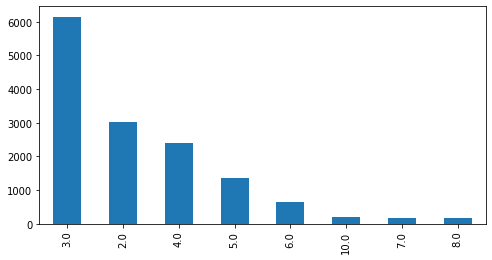

In [32]:
plt.figure(figsize=(8,4))
employee_df['tenure'].value_counts().plot.bar()  # plotting frequency graph of tenure

In [33]:
# Calculating mean of last_evaluation and satisfaction.
a = employee_df['last_evaluation'].mean()
b = employee_df['satisfaction'].mean()

In [34]:
 # filling missing values of last_evaluation and satisfaction with their mean
employee_df = employee_df.fillna({'last_evaluation':a,'satisfaction':b}) 

In [35]:
# checking shape
employee_df.shape

(14116, 14)

In [36]:
employee_df.head()  # checking top 5 values of employee table

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name
0,246.0,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42,Female,Married,Sales
1,134.0,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23,Female,Unmarried,Sales
2,155.0,0.0,0.464598,2,0.0,medium,0.414451,Left,3.0,127792,23,Female,Unmarried,Sales
3,156.0,0.0,0.718322,2,0.0,medium,0.465747,Left,3.0,128509,25,Female,Unmarried,Sales
4,233.0,0.0,0.965382,5,0.0,medium,0.962314,Left,5.0,125077,22,Female,Unmarried,Sales


In [37]:
# checking if any null value is left
employee_df.isnull().sum().any()

False

In [38]:
employee_df.columns[employee_df.isna().any()].tolist()

[]

In [39]:
employee_df.describe()    # checking mean median and outliers of numerical variable

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
count,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000
mean,199.992632,0.144588,0.718322,3.777770,0.021040,0.621322,3.492420,112120.657764,32.896005
std,50.826952,0.351697,0.163699,1.249693,0.143523,0.249126,1.453548,8497.639403,9.975000
min,49.000000,0.000000,0.316175,1.000000,0.000000,0.040058,2.000000,100101.000000,22.000000
25%,155.000000,0.000000,0.579516,3.000000,0.000000,0.452826,3.000000,105773.500000,24.000000
50%,199.000000,0.000000,0.718322,4.000000,0.000000,0.648350,3.000000,111293.500000,29.000000
75%,245.000000,0.000000,0.856854,5.000000,0.000000,0.822960,4.000000,116655.250000,41.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,148988.000000,57.000000


### Obs 3: All looks good; there is no outlier.

## 4.3 Grouping

In [40]:
status = employee_df.groupby('status') # finding avg of people left and employed using groupby function
status.mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
status,,,,,,,,,
Employed,197.905120,0.175541,0.714761,3.759223,0.025927,0.675115,3.376638,111060.050739,33.183533
Left,206.688227,0.045306,0.729743,3.837258,0.005365,0.448781,3.863785,115522.503428,31.973770


### Obs 4: Here we can see that employees who left have low satisfaction level and have not been recently promoted.

# 5. Data Visualization

(array([0, 1]), <a list of 2 Text xticklabel objects>)

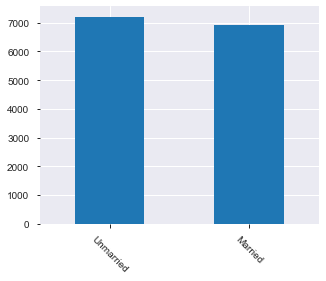

In [125]:
# plotting frequency graph of married and unmarried people 

plt.figure(figsize=(5,4))
employee_df['marital_status'].value_counts().plot.bar()
employee_df['marital_status'].value_counts()
# Rotate x-labels
plt.xticks(rotation=-45)

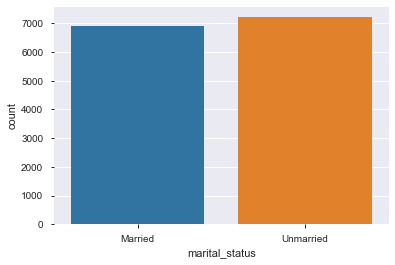

In [126]:
sns.countplot(x='marital_status',data=employee_df)
plt.show()

### Obs 5: No. of married and unmarried people are almost equal.

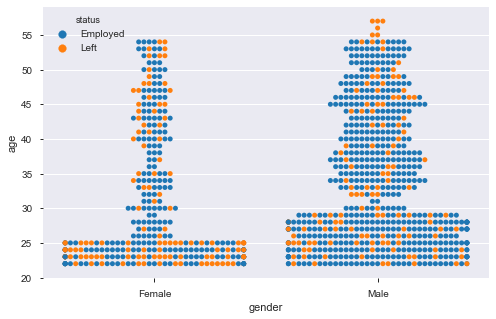

In [127]:
plt.figure(figsize=(8,5))
sns.swarmplot(x = 'gender',y='age',data = employee_df.sample(1000),hue = 'status')

### Obs 6: Age 30 seems to be crucial - as most of people are leaving by the time they are near 30.

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x576 with 0 Axes>

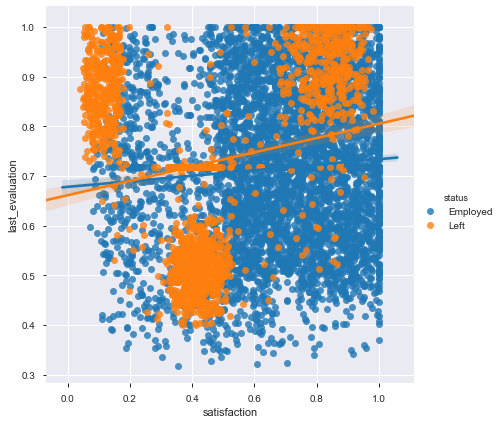

In [128]:
# plotting graph between last_evaluation and satisfaction level of people left and employed
plt.figure(figsize=(10,8))
sns.lmplot(x = 'satisfaction',y = 'last_evaluation',data=employee_df.sample(7000), hue = 'status', size = 6)

### Obs 7: Some people have high satisfaction and evaluation still they have left. Some people have moderate satisfaction and evaluation and have left - maybe their expectation was more. Some peolpe have high evaluation and very low satisfaction - these are the people who are highly disappointed.

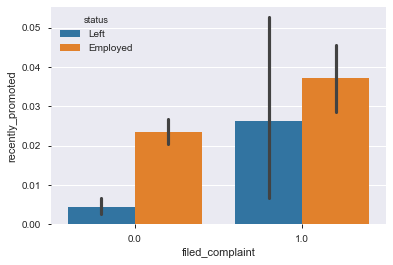

In [129]:
# plot to see if people have been promoted or not after making complaint
sns.barplot(x = 'filed_complaint',y = 'recently_promoted',data=employee_df, hue = 'status')

### Obs 8: Even after making complaints, large number of people have got promoted but at the same time many people have left also. So promotion was not the only aspect which employees were expecting - maybe their complaints were not resolved.

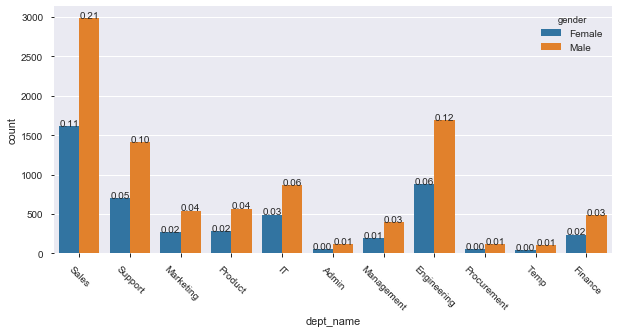

In [130]:
# frequency count of male and female in each department
plt.figure(figsize=(10,10))
plt.subplot(211)
total = float(len(employee_df))

ax = sns.countplot(x='dept_name',hue = 'gender',data=employee_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height +3,'{:1.2f}'.format(height/total),ha='center')
    # Rotate x-labels
plt.xticks(rotation=-45)
plt.show()

### Obs 9: Sales department is having highest no. of employees followed by Engineering and support department. We have more males in all the departments than females.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

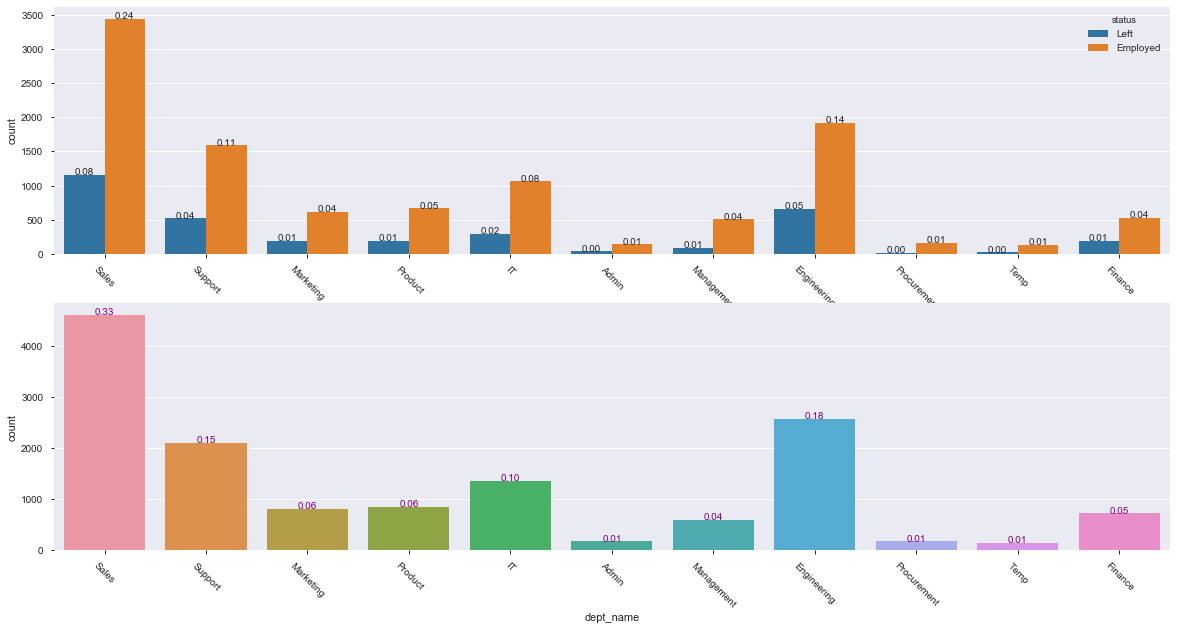

In [131]:
plt.figure(figsize=(20,10))
plt.subplot(211)
total = float(len(employee_df))

ax = sns.countplot(x='dept_name',hue = 'status',data=employee_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height +3,'{:1.2f}'.format(height/total),ha='center')

# Rotate x-labels
plt.xticks(rotation=-45)

plt.subplot(212)
total = float(len(employee_df))

ax = sns.countplot(x='dept_name',data=employee_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height +3,'{:1.2f}'.format(height/total),ha='center',color='purple')
    
# Rotate x-labels
plt.xticks(rotation=-45)

### Obs 10: From the above graphs, it looks like most people have left from the Sales department, followed by Engineering department but it is the Sales department (28%) which has the maximum number of employees too, followed by Engineering department (18%).

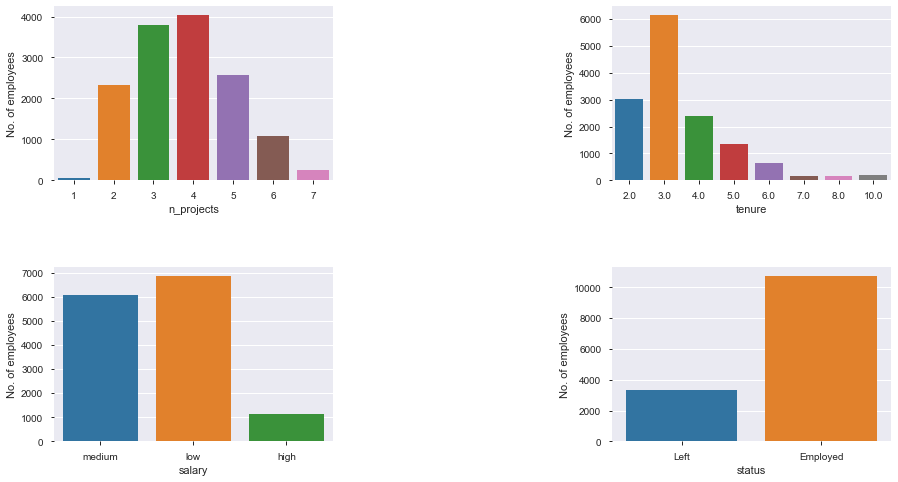

In [132]:
# plot to see frequency count of various variables

plt.figure(figsize=(15,8))

# Creating a subplot with 2 rows, 2 columns

plt.subplot(221)
sns.countplot(x='n_projects',data = employee_df)
plt.ylabel('No. of employees')


plt.subplot(222)
sns.countplot(x = 'tenure',data = employee_df)
plt.ylabel('No. of employees')


plt.subplot(223)
sns.countplot(x='salary',data=employee_df)
plt.ylabel('No. of employees')


plt.subplot(224)
sns.countplot(x='status',data = employee_df)
plt.ylabel('No. of employees')
plt.subplots_adjust(hspace=.5,wspace=1.0)

### Obs 11. Most of employees have done 3-4 projects.
### Obs 12. Most of employees have been employed for around three years and very few employees have spent more than 6-7 years with the company.
### Obs 13. Most of employees lies between low to medium salary range and very few have high salary.
### Obs 14. Almost 23 percent of employees have left the company.

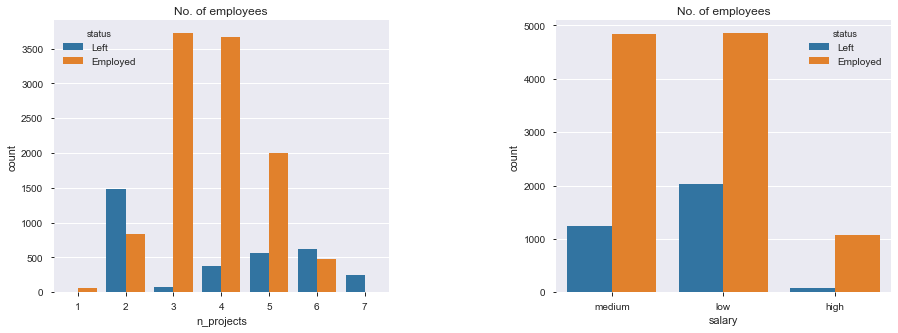

In [133]:
# graph to compare no. of projects and salary between people left and employed

plt.figure(figsize=(15,5))   

plt.subplot(121)
sns.countplot(x='n_projects',data = employee_df,hue = 'status')
plt.title('No. of employees')

plt.subplot(122)
sns.countplot(x='salary',data=employee_df,hue = 'status')
plt.title('No. of employees')
plt.subplots_adjust(wspace = .5)

### Obs 15: It can be seen that people having fewer projects have tendency to quit the company.
### Obs 16: From the salary graph, we can conclude that most of people who have left had a low salary.

Text(0.5, 1.0, 'No. of employee')

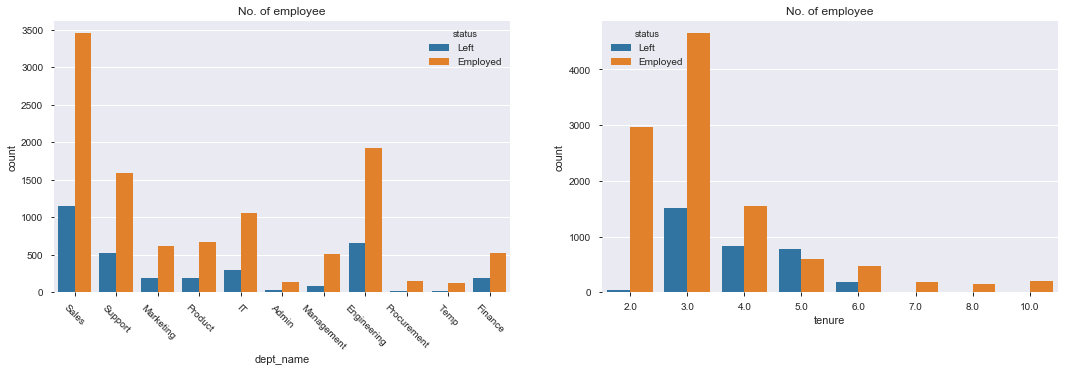

In [134]:
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.countplot(x='dept_name',data= employee_df,hue = 'status')
plt.title('No. of employee')
# Rotate x-labels
plt.xticks(rotation=-45)

plt.subplot(122)
sns.countplot(x='tenure',data= employee_df,hue = 'status')
plt.title('No. of employee')

### Obs 17: An employee is likely to leave the company in 3 years but is less likely to leave after having an experience of 7 years or more.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

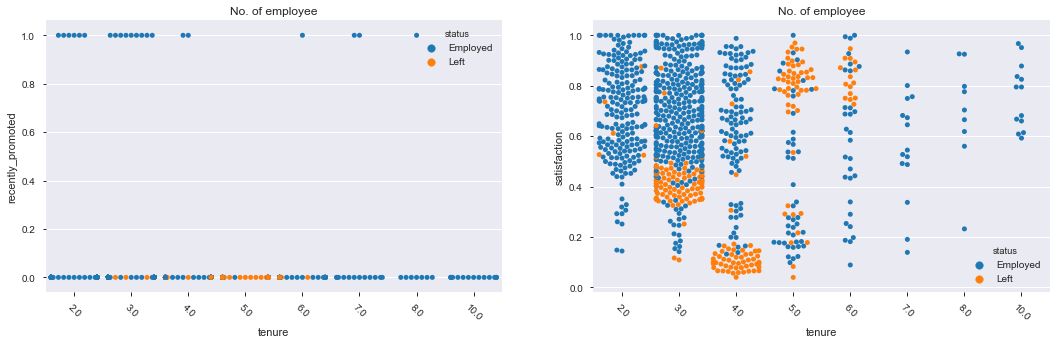

In [135]:
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.swarmplot(x = 'tenure',y='recently_promoted',data = employee_df.sample(1000),hue = 'status')
plt.title('No. of employee')
# Rotate x-labels
plt.xticks(rotation=-45)

plt.subplot(122)
sns.swarmplot(x = 'tenure',y='satisfaction',data = employee_df.sample(1000),hue = 'status')
plt.title('No. of employee')
# Rotate x-labels
plt.xticks(rotation=-45)

### Obs 18: Employees who have spent more than 3 years are leaving the company maybe due to no promotion or less satisfaction. But some employees who have spent more than 3 years have still left even though they were satisfied, so there were some other factors affecting their attrition.

In [136]:
# checking co-relation of variables
employee_df.corr()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
avg_monthly_hrs,1.000000,-0.009322,0.317977,0.439014,0.001633,-0.019107,0.129413,0.010069,0.206099
filed_complaint,-0.009322,1.000000,-0.013911,-0.006033,0.043591,0.056444,0.007202,-0.030404,-0.003933
last_evaluation,0.317977,-0.013911,1.000000,0.327068,-0.008007,0.084845,0.128836,0.013665,0.152133
n_projects,0.439014,-0.006033,0.327068,1.000000,-0.003159,-0.141042,0.196403,0.003978,0.624943
recently_promoted,0.001633,0.043591,-0.008007,-0.003159,1.000000,0.025801,0.071232,-0.026640,0.003310
satisfaction,-0.019107,0.056444,0.084845,-0.141042,0.025801,1.000000,-0.097328,-0.080146,-0.045334
tenure,0.129413,0.007202,0.128836,0.196403,0.071232,-0.097328,1.000000,0.008372,0.090586
employee_id,0.010069,-0.030404,0.013665,0.003978,-0.026640,-0.080146,0.008372,1.000000,-0.036190
age,0.206099,-0.003933,0.152133,0.624943,0.003310,-0.045334,0.090586,-0.036190,1.000000


### Obs 18: None of the features seem to be very correlated. Only age and number of projects seem to be correlated to some extent.

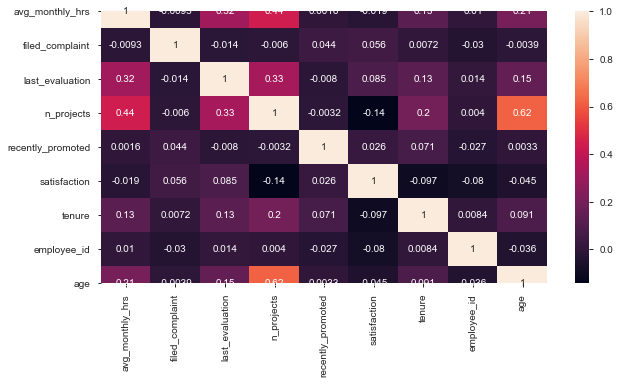

In [137]:
plt.figure(figsize=(10,5))
sns.heatmap(employee_df.corr(), annot = True)  # checking co-relation

# 6. Summary

### Summarizing all the observations:
   - __General observations about the data__:
   
    - 1: No. of married and unmarried people are almost equal.
    - 2: Most of employees have done 3-4 projects.
    - 3: Most of employees have been employed for around three years and very few employees have spent more than 6-7 years with the company.
    - 4: Most of employees lies between low to medium salary range and very few have high salary.
    - 5: Sales department is having highest no. of employees followed by Engineering and support department. Also, we have more males in all the departments than females.
    
    
   - __General observations about attrition__:
   
       - 1: Almost 23 percent of employees have left the company.
       - 2: From the above graphs, it looks like most people have left from the Sales department, followed by Engineering department but it is the Sales department (28%) which has the maximum number of employees too, followed by Engineering department (18%).
       - 3: Even after making complaints, large number of people have got promoted but at the same time many people have left also. So promotion was not the only aspect which employees were expecting - maybe their complaints were not resolved.
       - 4: Employees who left had a low satisfaction level.
       - 5: Employees who left had not been recently promoted.
       - 6: Age 30 seems to be crucial - as most of people are leaving by the time they are near 30.
       - 7: Some people have high satisfaction and evaluation still they have left. Some people have moderate satisfaction and evaluation and have left - maybe their expectation was more. Some peolpe have high evaluation and very low satisfaction - these are the people who are highly disappointed.
       - 8: It can be seen that people having fewer projects have tendency to quit the company.
       - 9: From the salary graph, we can conclude that most of people who have left had a low salary.
       - 10: An employee is likely to leave the company in 3 years but is less likely to leave after having an experience of 7 years or more.
       - 11: Employees who have spent more than 3 years are leaving the company maybe due to no promotion or less satisfaction. But some employees who have spent more than 3 years have still left even though they were satisfied, so there were some other factors affecting their attrition.

# 7. Converting object variables to numeric

In [41]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14144
Data columns (total 14 columns):
avg_monthly_hrs      14116 non-null float64
filed_complaint      14116 non-null float64
last_evaluation      14116 non-null float64
n_projects           14116 non-null int64
recently_promoted    14116 non-null float64
salary               14116 non-null object
satisfaction         14116 non-null float64
status               14116 non-null object
tenure               14116 non-null float64
employee_id          14116 non-null int64
age                  14116 non-null int64
gender               14116 non-null object
marital_status       14116 non-null object
dept_name            14116 non-null object
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


In [42]:
# converting object variable to int
employee_df['gender']=employee_df['gender'].apply(lambda x : 1 if x=='Male' else 0)
employee_df['marital_status']=employee_df['marital_status'].apply(lambda x : 1 if x=='Married' else 0)
employee_df['status']=employee_df['status'].apply(lambda x : 0 if x=='Employed' else 1)

In [43]:
Department = pd.get_dummies(employee_df['dept_name'],drop_first=True)

In [44]:
employee_df.drop(['dept_name'],axis=1,inplace=True)

In [45]:
employee_df = pd.concat([employee_df,Department],axis=1)

In [46]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
employee_df['salary']=le.fit_transform(employee_df['salary'])

In [47]:
employee_df.salary.unique()

array([2, 1, 0], dtype=int64)

In [48]:
employee_df.gender.unique()

array([0, 1], dtype=int64)

In [49]:
employee_df.marital_status.unique()

array([1, 0], dtype=int64)

In [50]:
employee_df.status.unique()

array([1, 0], dtype=int64)

In [51]:
employee_df.info() # checking if all features have been converted to numeric or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14144
Data columns (total 23 columns):
avg_monthly_hrs      14116 non-null float64
filed_complaint      14116 non-null float64
last_evaluation      14116 non-null float64
n_projects           14116 non-null int64
recently_promoted    14116 non-null float64
salary               14116 non-null int32
satisfaction         14116 non-null float64
status               14116 non-null int64
tenure               14116 non-null float64
employee_id          14116 non-null int64
age                  14116 non-null int64
gender               14116 non-null int64
marital_status       14116 non-null int64
Engineering          14116 non-null uint8
Finance              14116 non-null uint8
IT                   14116 non-null uint8
Management           14116 non-null uint8
Marketing            14116 non-null uint8
Procurement          14116 non-null uint8
Product              14116 non-null uint8
Sales                14116 non-null uin

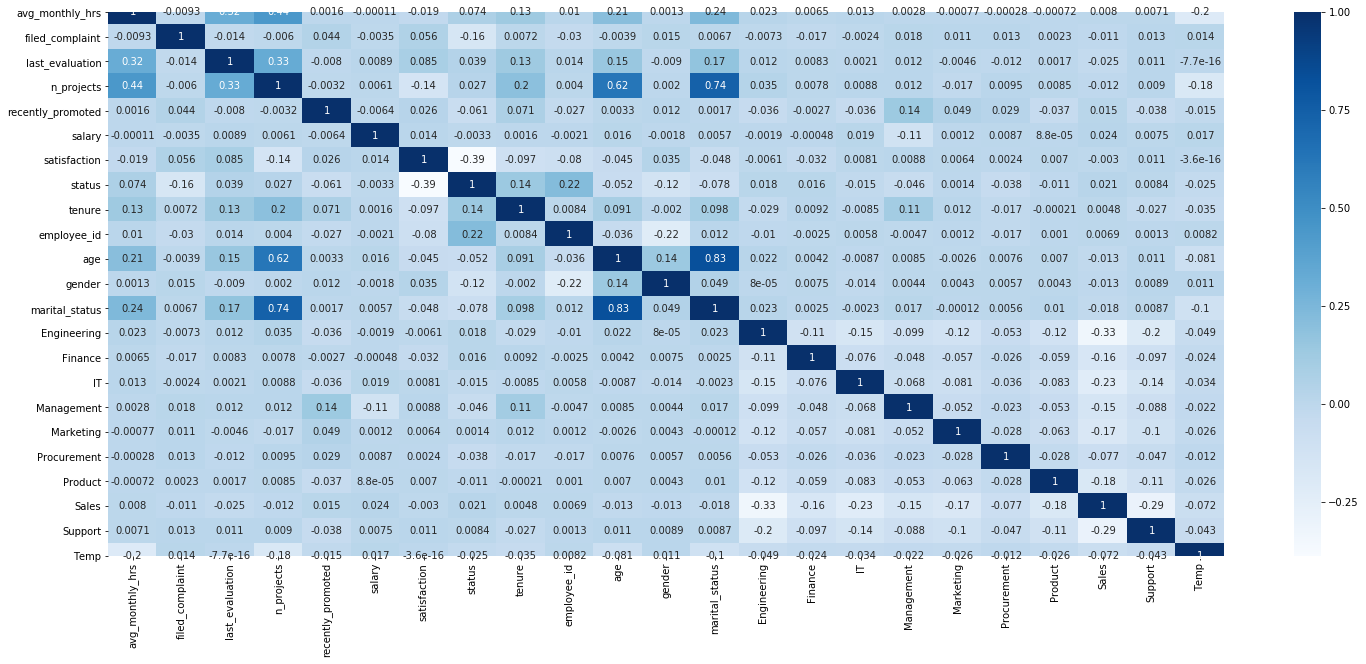

In [52]:
plt.figure(figsize = (25,10))
sns.heatmap(employee_df.corr(),annot = True,cmap = 'Blues')

In [53]:
employee_df.skew()

avg_monthly_hrs      0.016431
filed_complaint      2.021414
last_evaluation     -0.068476
n_projects           0.315288
recently_promoted    6.675296
salary              -0.419052
satisfaction        -0.477507
status               1.232700
tenure               1.871919
employee_id          1.304670
age                  0.700883
gender              -0.665763
marital_status       0.043370
Engineering          1.646112
Finance              4.075375
IT                   2.737731
Management           4.579683
Marketing            3.801097
Procurement          8.867045
Product              3.689967
Sales                0.742764
Support              1.967935
Temp                 9.546558
dtype: float64

In [54]:
m = list(employee_df.columns)
n = list(filter(lambda t: t not in ['status','employee_id'], m))

In [55]:
X = employee_df[n]
y = employee_df['status']

## Algorithm Selection and Model Training

In [56]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
#Normalizing the values using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## 8.1 Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg = LogisticRegression()


In [59]:
logreg.fit(X_train_sc,y_train)
y_pred_lr = logreg.predict(X_test_sc)
logreg_score = accuracy_score(y_test,y_pred_lr)
print('Accuracy for Logistic Regression is:',accuracy_score(y_test,y_pred_lr))

Accuracy for Logistic Regression is: 0.784887839433294


In [60]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3194
           1       0.61      0.35      0.44      1041

    accuracy                           0.78      4235
   macro avg       0.71      0.64      0.65      4235
weighted avg       0.76      0.78      0.76      4235



## 8.2 KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
y_pred_knn = knn.predict(X_test_sc)
print("With K=1")
print('Accuracy for KNN is:',accuracy_score(y_test,y_pred_knn))

With K=1
Accuracy for KNN is: 0.9251475796930342


In [63]:
## Using cross validation to find the best parameter for k 
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors =i)
    score = cross_val_score(knn,X_train_sc,y_train,cv =5)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy Rate')

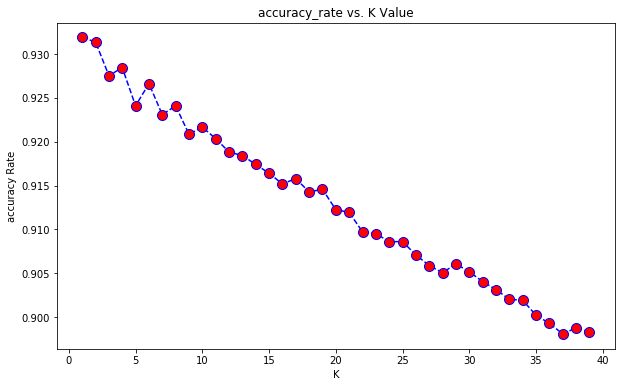

In [64]:

plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy Rate')

In [65]:
print('with k = 40')

knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train_sc,y_train)
y_pred_knn1 = knn.predict(X_test_sc)
knn_accuracy = accuracy_score(y_pred_knn1,y_test)
print(knn_accuracy)

with k = 40
0.9008264462809917


# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtree = DecisionTreeClassifier(random_state=0)

In [70]:
tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dtree,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
             

In [71]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': None}

In [72]:
y_pred_dt = grid_search.predict(X_test_sc)

In [73]:
dt_accuracy = accuracy_score(y_pred_dt,y_test)
print(dt_accuracy)

0.971900826446281


In [74]:
confusion_matrix(y_pred_dt,y_test)

array([[3161,   86],
       [  33,  955]], dtype=int64)

accuracy for Decision tree is : 0.971900826446281


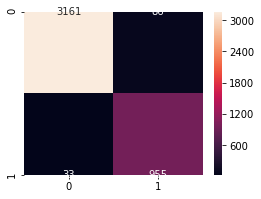

In [75]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_pred_dt,y_test),annot = True, fmt = '.0f')

print('accuracy for Decision tree is :',dt_accuracy)

In [76]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3247
           1       0.92      0.97      0.94       988

    accuracy                           0.97      4235
   macro avg       0.95      0.97      0.96      4235
weighted avg       0.97      0.97      0.97      4235



# SVM

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [175]:
sv_classifier = SVC()

In [176]:
sv_classifier.fit(X_train_sc,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [181]:
y_pred_svm_n = sv_classifier.predict(X_test_sc)
accuracy_n = accuracy_score(y_test,y_pred_svm_n)
print(accuracy_n)

0.947107438016529


In [182]:
svparams ={
    'C':(np.arange(0.1,1,0.1)),'kernel':['linear']
    ,'C':(np.arange(0.1,1,0.1)),'gamma':[.01,.02,.03,.04,.05],'kernel':['poly']
    ,'C':(np.arange(0.1,1,0.1)),'kernel':['rbf'],'gamma':[.01,.02,.03,.04,.05]}

In [183]:
grid_search_1 = GridSearchCV(sv_classifier,param_grid = svparams,verbose=False, cv =5)

In [184]:
grid_search_1.fit(X_train_sc,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [185]:
y_pred_svm = grid_search.predict(X_test_sc)

In [186]:
accuracy_svm = accuracy_score(y_pred_svm,y_test)
print(accuracy_svm)

0.9463990554899646


In [187]:
models = pd.DataFrame({'model':['Logistic Regression','KNN','Decision Tree','SVM'],
                       'Score':[logreg_score,knn_accuracy,dt_accuracy,accuracy_svm]})
models.sort_values(by = 'Score',ascending = False)

,model,Score
2,Decision Tree,0.971901
3,SVM,0.946399
1,KNN,0.900826
0,Logistic Regression,0.784888


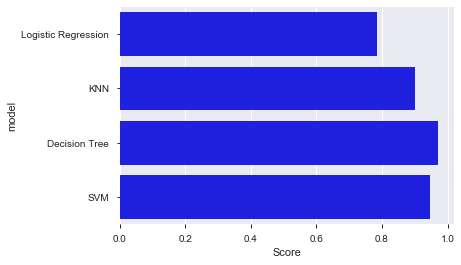

In [188]:
sns.barplot(y = 'model',x = 'Score',data = models,color ='b')